### HomeWork


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # hồi quy tuyến tính


In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df['Fare'].isnull().sum()  # ko có phần tử null nên chỉ xét TH xử lý ngoại lệ 

0

### Fill dữ liệu sử dụng Median

In [4]:
median=df['Age'].median()
print(median)
df['Age_median']=df['Age'].fillna(median)
df.head()

28.0


,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


### Fill dữ liệu sử dụng Mean

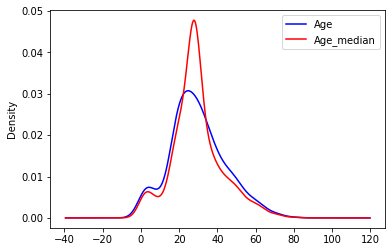

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_median'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [6]:
mean=df['Age'].mean()
print(mean)
df['Age_Mean']=df['Age'].fillna(mean)

29.69911764705882


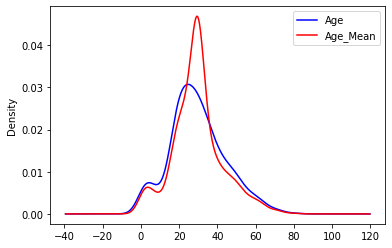

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_Mean'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Fill dữ liệu sử dụng Mode Imputation

In [8]:
import statistics
# xài value_count.head()
mode_imputation=statistics.mode(df['Age']) # tìm số lần xuất hiện nhiều nhất
#mode_imputation = df['Age'].value_counts().head(1) # cách 2 
print(mode_imputation)
df['Age_Mode']=df['Age'].fillna(mode_imputation)

24.0


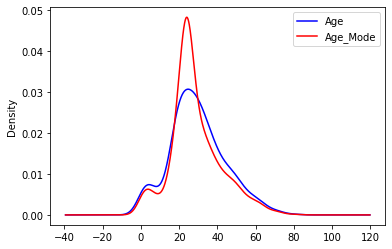

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_Mode'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [10]:
# import matplotlib.pyplot as plt
# fig , ax = plt.subplots(3,figsize=(15,15))
# ax[0] = fig.add_subplot(311)
# df['Age'].plot(kind='kde', color='blue')
# df['Age_Mean'].plot(kind='kde', color='red')
# lines, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(lines, labels, loc='best')
   
# ax[1] = fig.add_subplot(312)
# df['Age'].plot(kind='kde', color='blue')
# df['Age_median'].plot(kind='kde', color='red')
# lines1, labels1 = ax[1].get_legend_handles_labels()
# ax[1].legend(lines1, labels1, loc='best')
   
# ax[2] = fig.add_subplot(313)
# df['Age'].plot(kind='kde', color='blue')
# df['Age_Mode'].plot(kind='kde', color='red')
# lines2, labels2 = ax[2].get_legend_handles_labels()
# ax[2].legend(lines2, labels2, loc='best')

### Fill bằng giá trị ngẫu nhiên

In [11]:
random_samples = df['Age'].dropna().sample(n=df['Age'].isnull().sum(),random_state=0) # random state luôn trả về giá trị giống nhau ứng với số lần
df[df['Age'].isnull()].index #  chỉ số của các khách hàng bị thiếu trong dữ liệu Age
random_samples.index = df[df['Age'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df['Age_random']=df['Age']
df.loc[df['Age'].isnull(), 'Age_random']=random_samples

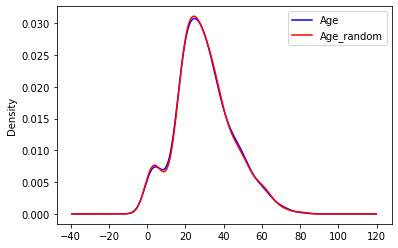

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [13]:

# input must not be contains NaN to get data 
x = df[["Age_random", "Fare"]]
y = df["Survived"]

Train_Score = []
Test_Score = []
for i in range(10) :
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=i) # i = 0 -> 9
    regression = LogisticRegression(max_iter = 1000)
    regression.fit(x_train, y_train )
    #print("Train Accuracy:",regression.score(x_train, y_train))
    Train_Score.append(regression.score(x_train, y_train))
    #print("Test Accuracy:",regression.score(x_test, y_test))
    Test_Score.append(regression.score(x_test, y_test))

mean_Train = np.mean(Train_Score)
mean_Test  = np.mean(Test_Score)
print("Train Accuracy Mean = " ,  mean_Train)
print("Test Accuracy Mean = " ,  mean_Test)

Train Accuracy Mean =  0.6658105939004816
Test Accuracy Mean =  0.6544776119402986


### Fill dữ liệu bằng giá trị đuôi phân bổ



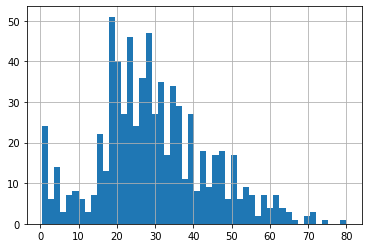

In [14]:
df['Last_Age'] = df['Age'] # lưu lại giá trị Age trước khi bị đổi .
df.Age.hist(bins=50)
extreme = df.Age.mean() + 3*df.Age.std()  # gia tri o duoi cua phan bo (bien Age theo phan bo chuan)

In [15]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_dist"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    
# gọi hàm thay thế dữ liệu
impute_nan(df,'Age',df.Age.median(),extreme)

c:\users\phanthetue\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

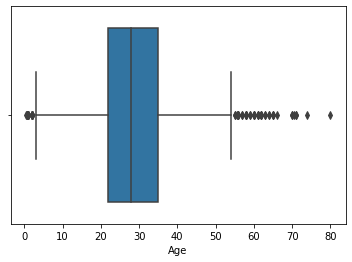

In [16]:
sns.boxplot('Age',data=df) # median

c:\users\phanthetue\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_dist'>

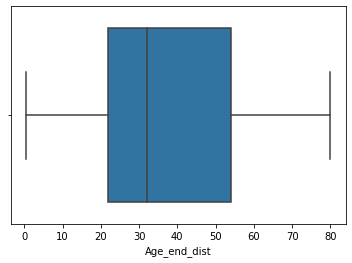

In [17]:
sns.boxplot('Age_end_dist',data=df)

## Lưu trữ lại tránh mất dữ liệu

In [18]:
print(df['Last_Age'].isnull().sum())
df['Age'] = df['Last_Age'] # gán lại giá trị để tránh mất lớp Age

177


### Fill dữ liệu bằng giá trị bất kỳ

In [19]:
def impute_nan_choice_values(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

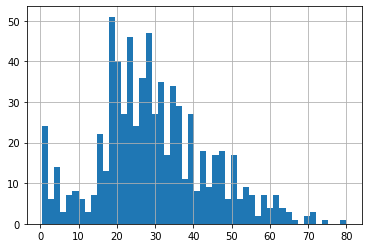

In [20]:
impute_nan_choice_values(df,'Age')
df['Age'].hist(bins=50)  # dâta trước khi fill 

<AxesSubplot:>

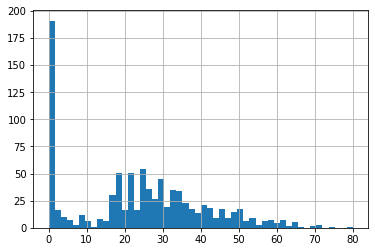

In [21]:
df['Age_zero'].hist(bins=50) # data sau khi fill = 0 

<AxesSubplot:>

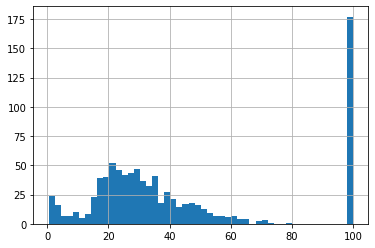

In [22]:
df['Age_hundred'].hist(bins=50) # data sau khi fill = 100

### Tạo đặc trưng mới 

In [23]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [24]:
df['Age'].fillna(df.Age.median(),inplace=True)

### Phương pháp OUTLIERS

In [25]:

# input must not be contains NaN to get data 
x = df[["Age", "Fare"]]
y = df["Survived"]

Train_Score = []
Test_Score = []
for i in range(10) :
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=i) # i = 0 -> 9
    regression = LogisticRegression(max_iter = 1000)
    regression.fit(x_train, y_train )
    #print("Train Accuracy:",regression.score(x_train, y_train))
    Train_Score.append(regression.score(x_train, y_train))
    #print("Test Accuracy:",regression.score(x_test, y_test))
    Test_Score.append(regression.score(x_test, y_test))

mean_Train = np.mean(Train_Score)
mean_Test  = np.mean(Test_Score)
print("Train Accuracy Mean = " ,  mean_Train)
print("Test Accuracy Mean = " ,  mean_Test)

Train Accuracy Mean =  0.6622792937399679
Test Accuracy Mean =  0.6533582089552239
